- [x] This is a complete item
- [ ] This is an incomplete item

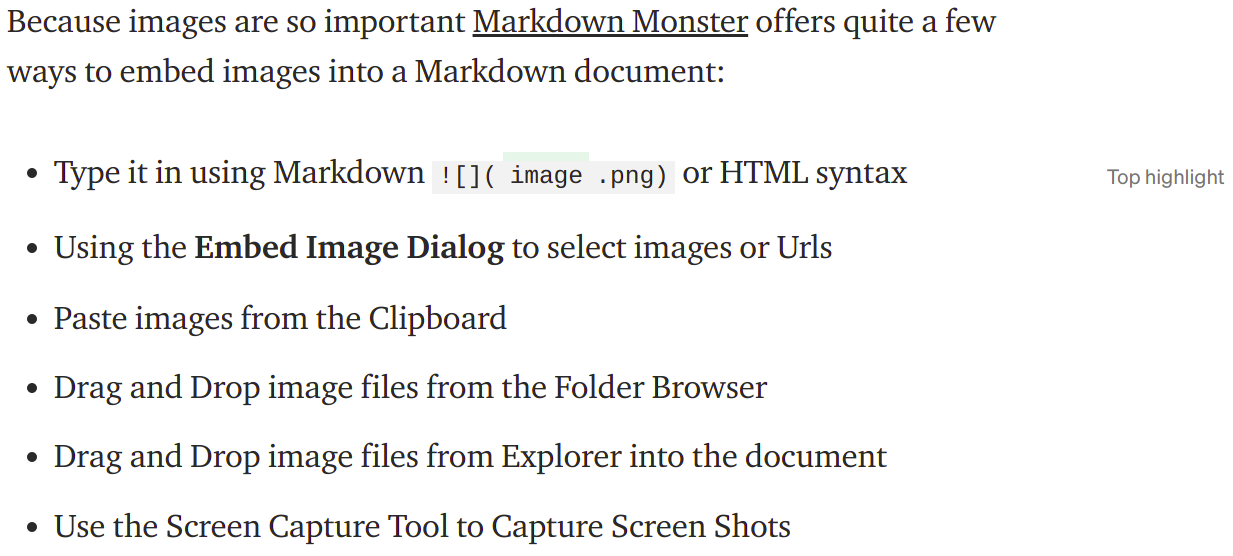

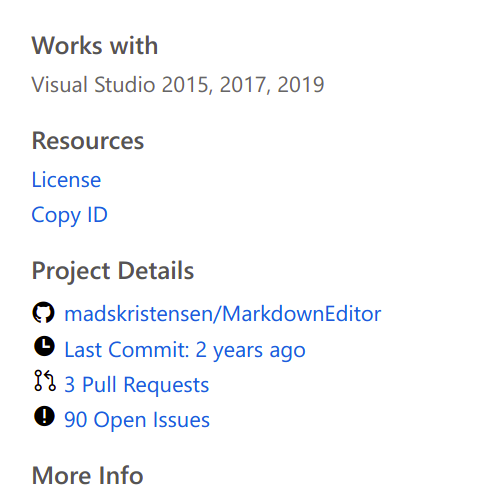

# Accuracy

In [ ]:
# we can use inbilit "score" method of classifier
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# below shows total unmatched points
accuracy_score(y_test, y_pred, normalize=False)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

# dataframe representation
round(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T, 2)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
confusion_matrix(y_true, y_pred, normalize="true")

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_heatmap(y_true, y_pred, label_mapping=None):
    labels = np.unique(np.concatenate((np.unique(y_test), np.unique(y_pred)), axis=0))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    mapping = labels
    if(label_mapping):
        mapping = [name_mapping[l] for l in labels]

    d = pd.DataFrame(cm)
    d.columns = mapping
    d.index = mapping

    sns.heatmap(d, annot=True, fmt=".4g", cmap="Blues", )
    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Predicted label',fontsize=12)
    plt.show();
# label_mapping = {0:"No", 1:"Yes"}

# Data Loss

In [ ]:
def clf_dataframe(y_test, y_pred, y_prob):
    y_pred = pd.Series(y_pred, index = y_test.index)
    y_prob = pd.DataFrame(y_prob, index = y_test.index)
    
    df = pd.concat([y_test, y_pred, y_prob], axis=1)
    df.columns = ["actual", "prediction", "0", "1"]
    return df
# y_prob = gnb.predict_proba(X_test)

In [ ]:
def clf_dataframe(y_test, y_pred, y_prob):
    y_pred = pd.Series(y_pred, index = y_test.index)
    y_prob = pd.DataFrame(y_prob, index = y_test.index)
    
    df = pd.concat([y_test, y_pred, y_prob], axis=1)
    df.columns = ["actual", "prediction", "0", "1"]
    df['new_prediction'] = df['0'].map(lambda x: 0 if x >= 0.6 else 1)
    return df
# y_prob = gnb.predict_proba(X_test)
#>>> dataframe[(dataframe["Actual"] == 1) & (dataframe["new_prediction"] == 0)]

# Brute Force Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def brute_force_clf(X, y):
    scores = []
    randoms = [s for s in range(100)]
    for r in tqdm(randoms):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=r);
        
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        scores.append(gnb.score(X_test, y_test))
        
    df = {"random_state": randoms, "score": scores}
    df = pd.DataFrame(df).sort_values(by="score", ascending=False)
    return df

brute_force_clf(X, y)